In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
heart_df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
heart_df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [3]:
heart_df['resting bp s'].replace(0, np.nan, inplace=True)
heart_df['cholesterol'].replace(0, np.nan, inplace=True)
heart_df['ST slope'].replace(0, np.nan, inplace=True)

In [4]:
heart_df.isnull().sum()

age                      0
sex                      0
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar      0
resting ecg              0
max heart rate           0
exercise angina          0
oldpeak                  0
ST slope                 1
target                   0
dtype: int64

In [5]:
heart_df.dropna(inplace=True)

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1017 non-null   int64  
 1   sex                  1017 non-null   int64  
 2   chest pain type      1017 non-null   int64  
 3   resting bp s         1017 non-null   float64
 4   cholesterol          1017 non-null   float64
 5   fasting blood sugar  1017 non-null   int64  
 6   resting ecg          1017 non-null   int64  
 7   max heart rate       1017 non-null   int64  
 8   exercise angina      1017 non-null   int64  
 9   oldpeak              1017 non-null   float64
 10  ST slope             1017 non-null   float64
 11  target               1017 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 103.3 KB


In [7]:
heart_df[['age', 'resting bp s', 'cholesterol','max heart rate','oldpeak']].describe().drop('count')

,age,resting bp s,cholesterol,max heart rate,oldpeak
mean,53.280236,132.554572,245.956735,142.741396,0.940118
std,9.408759,17.451147,57.250469,24.521584,1.093810
min,28.000000,92.000000,85.000000,69.000000,-0.100000
25%,46.000000,120.000000,209.000000,125.000000,0.000000
50%,54.000000,130.000000,240.000000,144.000000,0.600000
75%,60.000000,140.000000,276.000000,161.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


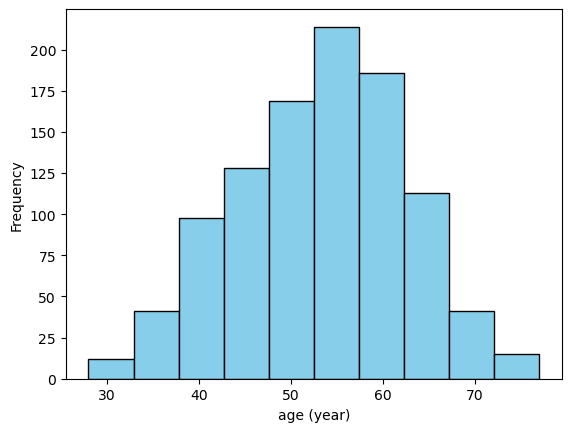

In [8]:
# Generate random data for the histogram
data = heart_df['age']
 
# Plotting a basic histogram
plt.hist(data, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('age (year)')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

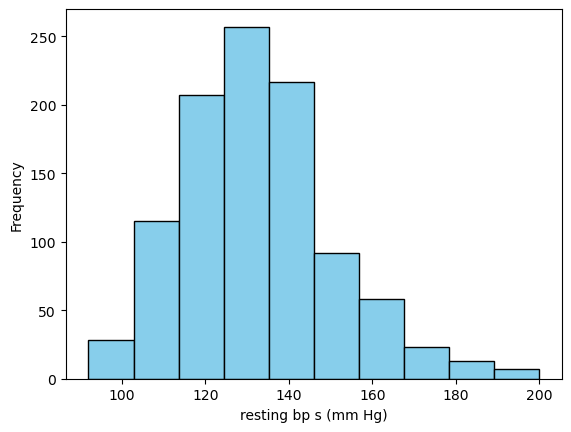

In [9]:
# Generate random data for the histogram
data = heart_df['resting bp s']
 
# Plotting a basic histogram
plt.hist(data, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('resting bp s (mm Hg)')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

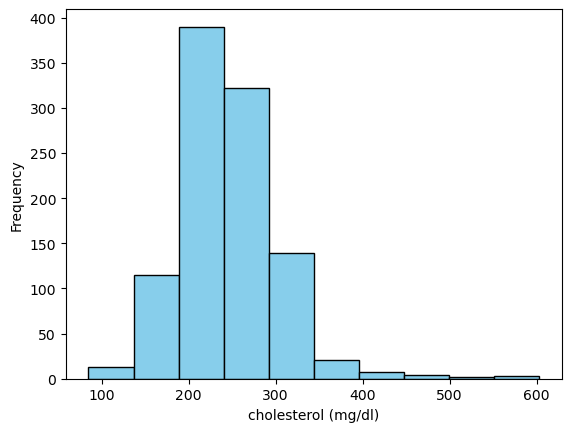

In [10]:
# Generate random data for the histogram
data = heart_df['cholesterol']
 
# Plotting a basic histogram
plt.hist(data, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('cholesterol (mg/dl)')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

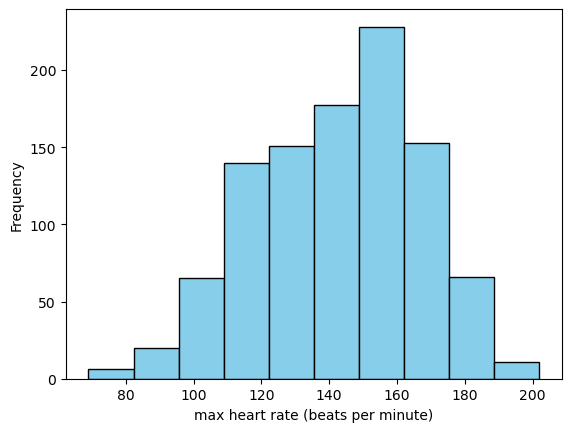

In [11]:
# Generate random data for the histogram
data = heart_df['max heart rate']
 
# Plotting a basic histogram
plt.hist(data, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('max heart rate (beats per minute)')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

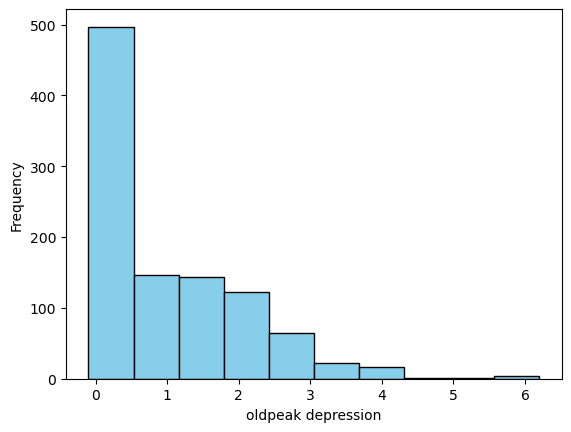

In [12]:
# Generate random data for the histogram
data = heart_df['oldpeak']
 
# Plotting a basic histogram
plt.hist(data, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('oldpeak depression')
plt.ylabel('Frequency')
 
# Display the plot
plt.show()

Text(0.5, 1.05, 'sex distribution')

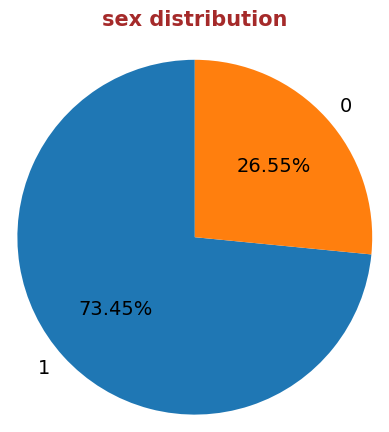

In [13]:
sorted_counts = heart_df['sex'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'sex distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [14]:
heart_df['sex'].value_counts()

sex
1    747
0    270
Name: count, dtype: int64

Text(0.5, 1.05, 'chest pain type distribution')

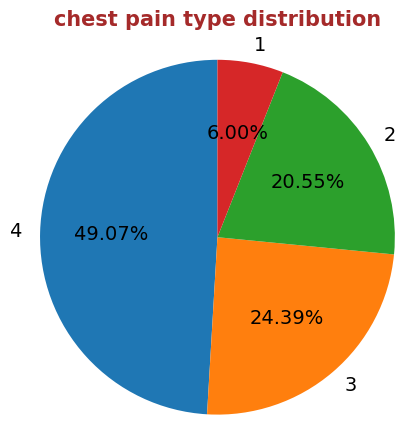

In [15]:
sorted_counts = heart_df['chest pain type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'chest pain type distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [16]:
heart_df['chest pain type'].value_counts()

chest pain type
4    499
3    248
2    209
1     61
Name: count, dtype: int64

Text(0.5, 1.05, 'fasting blood sugar distribution')

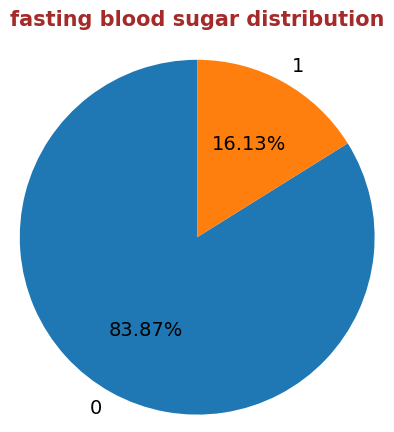

In [17]:
sorted_counts = heart_df['fasting blood sugar'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'fasting blood sugar distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [18]:
heart_df['fasting blood sugar'].value_counts()

fasting blood sugar
0    853
1    164
Name: count, dtype: int64

Text(0.5, 1.05, 'resting ecg distribution')

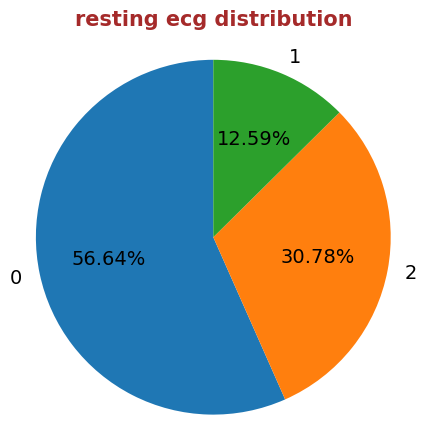

In [19]:
sorted_counts = heart_df['resting ecg'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'resting ecg distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [20]:
heart_df['resting ecg'].value_counts()

resting ecg
0    576
2    313
1    128
Name: count, dtype: int64

Text(0.5, 1.05, 'exercise angina distribution')

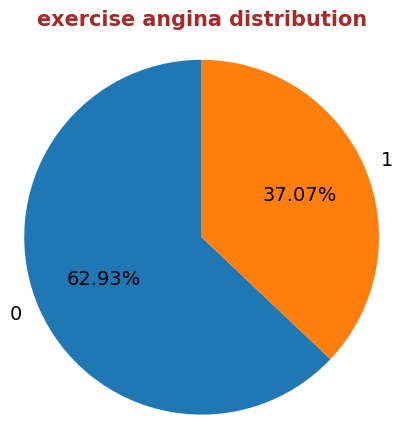

In [21]:
sorted_counts = heart_df['exercise angina'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'exercise angina distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [22]:
heart_df['exercise angina'].value_counts()

exercise angina
0    640
1    377
Name: count, dtype: int64

Text(0.5, 1.05, 'ST slope distribution')

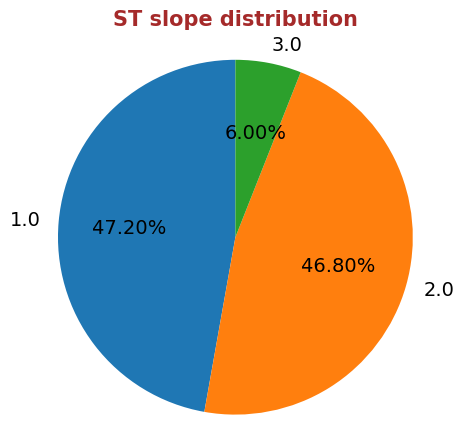

In [23]:
sorted_counts = heart_df['ST slope'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'ST slope distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [24]:
heart_df['ST slope'].value_counts()

ST slope
1.0    480
2.0    476
3.0     61
Name: count, dtype: int64

Text(0.5, 1.05, 'target Distribution')

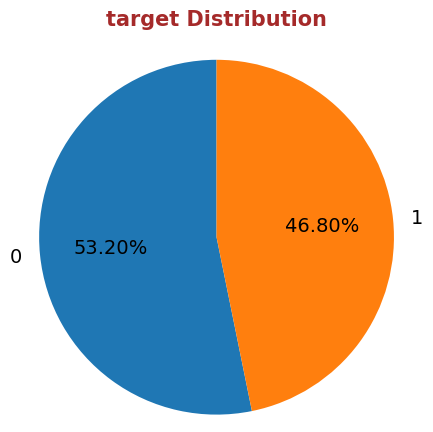

In [25]:
sorted_counts = heart_df['target'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                     counterclock = True, radius = 1.2, textprops={'fontsize': 14})
plt.title(f'target Distribution',fontsize=15, weight='bold', color='brown', loc='center', y=1.05)

In [26]:
heart_df['target'].value_counts()

target
0    541
1    476
Name: count, dtype: int64

In [27]:
heart_df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [28]:
heart_df.query("target == 1").mode()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,58,1,4,140.0,282.0,0,0,150,1,0.0,2.0,1


In [29]:
heart_df.query("target == 0").mode()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,54.0,1.0,3.0,120.0,211.0,0.0,0.0,160.0,0.0,0.0,1.0,0.0
1,NaN,NaN,NaN,NaN,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
heart_df.pivot_table(
    index='target', 
    values = ['age', 'resting bp s', 'cholesterol', 'max heart rate','oldpeak'], 
    aggfunc='mean')

,age,cholesterol,max heart rate,oldpeak,resting bp s
target,,,,,
0,50.872458,240.221811,151.650647,0.456562,129.767098
1,56.016807,252.474790,132.615546,1.489706,135.722689


<Axes: title={'center': 'age'}, xlabel='target'>

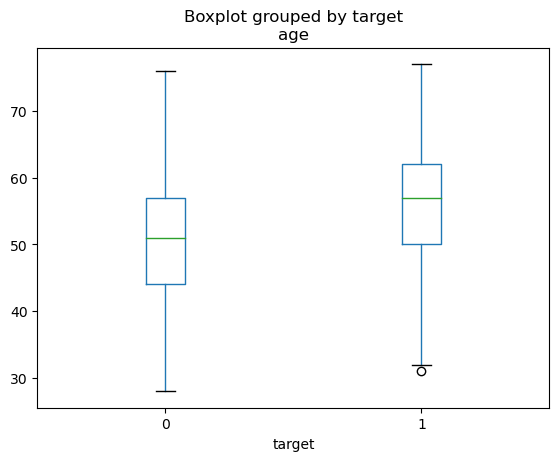

In [31]:
heart_df.boxplot(column = 'age', by = 'target', grid = False)

<Axes: title={'center': 'resting bp s'}, xlabel='target'>

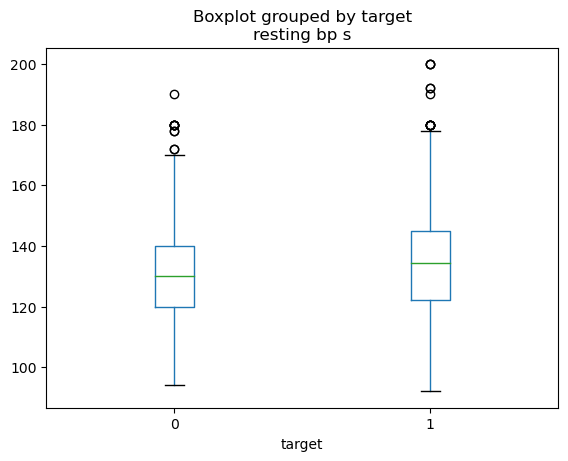

In [32]:
heart_df.boxplot(column = 'resting bp s', by = 'target', grid = False)

<Axes: title={'center': 'cholesterol'}, xlabel='target'>

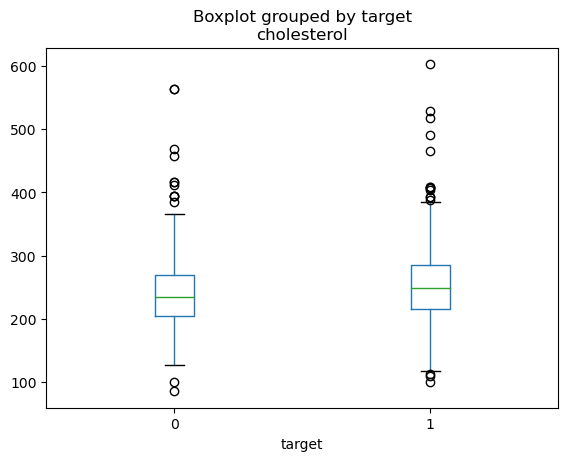

In [33]:
heart_df.boxplot(column = 'cholesterol', by = 'target', grid = False)

<Axes: title={'center': 'max heart rate'}, xlabel='target'>

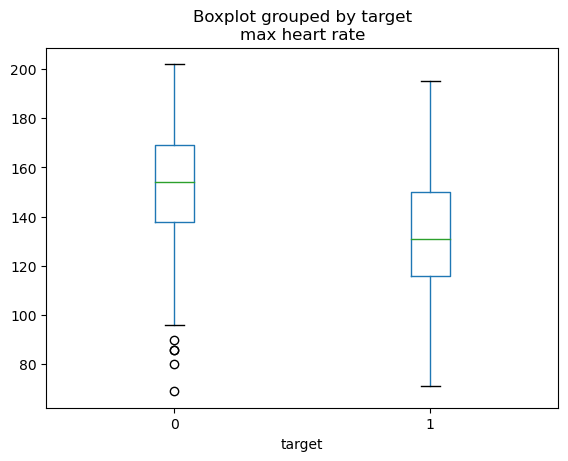

In [34]:
heart_df.boxplot(column = 'max heart rate', by = 'target', grid = False)

<Axes: title={'center': 'oldpeak'}, xlabel='target'>

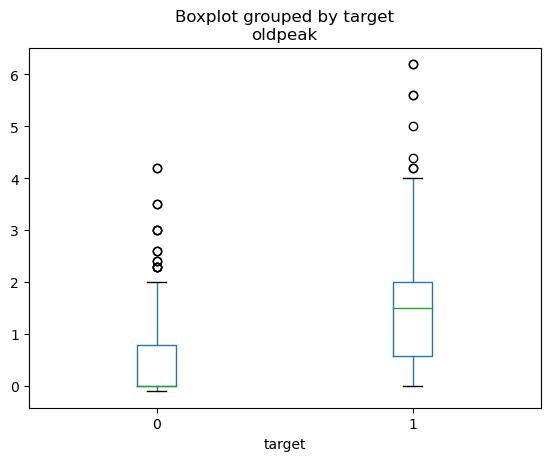

In [35]:
heart_df.boxplot(column = 'oldpeak', by = 'target', grid = False)

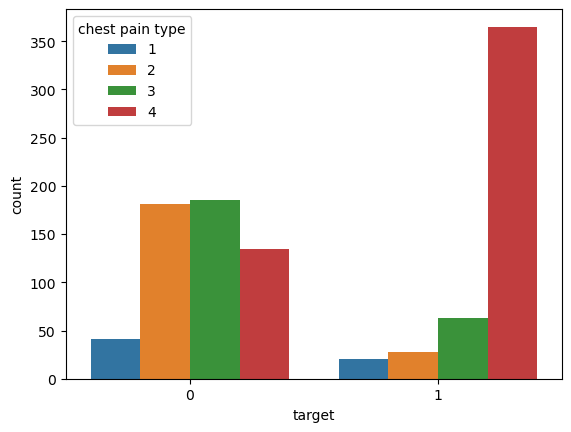

In [36]:
ax = sns.countplot(x="target",hue="chest pain type", data=heart_df)

In [37]:
X = heart_df.drop(columns = 'target')
y = heart_df.target

Test_size   = 0.3    # 0 to 1
Random_seed = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = Test_size,
                                                    random_state = Random_seed)

In [38]:
criterions = ['entropy','gini']
random_state_i = Random_seed
max_depth_x = list(range(2,13))

models= []
i = 0
for criterion_i in ['entropy','gini']:
    for max_depth_i in max_depth_x:
        i = i+1 
        model = DecisionTreeClassifier(
                    criterion= criterion_i,
                    max_depth= max_depth_i, 
                    random_state= random_state_i,
                    )
        models.append(['DT_'+str(i), model])

In [39]:
score_all = []

for model_name, model in models:

    model.fit(X_train, y_train) 
    fi  = model.feature_importances_
    
    for sample  in ['train','test']:
        X_ = eval('X_'+sample)
        y_ = eval('y_'+sample)
        
        accu_score = model.score(X_,y_)

        prec_score  = metrics.precision_score(y_,model.predict(X_),average= None)

        recall_score  = metrics.recall_score(y_,model.predict(X_),average= None)
        
        score_all.append([model_name,sample,accu_score,prec_score,recall_score,fi])

df_report =pd.DataFrame(score_all,columns=['model','data','accuracy','precision','recall','importantF'])

In [40]:
a = df_report.pivot( index = 'model', columns = 'data', values= 'accuracy')

In [41]:
a.max()

data
test     0.905229
train    1.000000
dtype: float64

In [42]:
a[a.test >= 0.90]

data,test,train
model,,
DT_22,0.905229,1.0


In [43]:
a[a.test >= 0.9].index

Index(['DT_22'], dtype='object', name='model')

In [44]:
models[21]

['DT_22', DecisionTreeClassifier(max_depth=12, random_state=1000)]

In [45]:
df_report.tail(1)

,model,data,accuracy,precision,recall,importantF
43,DT_22,test,0.905229,"[0.8873239436619719, 0.9207317073170732]","[0.9064748201438849, 0.9041916167664671]","[0.07302658476574798, 0.040892967537557376, 0...."


In [46]:
e = pd.DataFrame(df_report.importantF.tolist(),columns= list(X.columns))
e.iloc[43,:]

age                    0.073027
sex                    0.040893
chest pain type        0.132422
resting bp s           0.072053
cholesterol            0.083976
fasting blood sugar    0.031367
resting ecg            0.027737
max heart rate         0.074966
exercise angina        0.030427
oldpeak                0.072709
ST slope               0.360424
Name: 43, dtype: float64

In [47]:
def command(X):
    y = heart_df.target

    Test_size   = 0.3    # 0 to 1
    Random_seed = 1000

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = Test_size,
                                                        random_state = Random_seed)
    criterions = ['entropy','gini']
    random_state_i = Random_seed
    max_depth_x = list(range(2,13))

    models= []
    i = 0
    for criterion_i in ['entropy','gini']:
        for max_depth_i in max_depth_x:
            i = i+1 
            model = DecisionTreeClassifier(
                        criterion= criterion_i,
                        max_depth= max_depth_i, 
                        random_state= random_state_i,
                        )
            models.append(['DT_'+str(i), model])
    score_all = []

    for model_name, model in models:

        model.fit(X_train, y_train) 
        fi  = model.feature_importances_

        for sample  in ['train','test']:
            X_ = eval('X_'+sample)
            y_ = eval('y_'+sample)

            accu_score = model.score(X_,y_)

            prec_score  = metrics.precision_score(y_,model.predict(X_),average= None)

            recall_score  = metrics.recall_score(y_,model.predict(X_),average= None)

            score_all.append([model_name,sample,accu_score,prec_score,recall_score,fi])

    df_report =pd.DataFrame(score_all,columns=['model','data','accuracy','precision','recall','importantF'])
    a = df_report.pivot( index = 'model', columns = 'data', values= 'accuracy')
    print(a.max())
    b = list(a.max())
    print(df_report[df_report.accuracy == b[0]])
    c = df_report[df_report.accuracy == b[0]].index
    for d in list(c):
        d = d//2
        print(models[d])

In [48]:
heart_df.drop(columns = 'target').columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')

In [49]:
X = heart_df[['chest pain type', 'ST slope']]
command(X)

data
test     0.787582
train    0.819972
dtype: float64
    model  data  accuracy                  precision  \
3    DT_2  test  0.787582  [0.7720588235294118, 0.8]   
25  DT_13  test  0.787582  [0.7720588235294118, 0.8]   

                                      recall  \
3   [0.7553956834532374, 0.8143712574850299]   
25  [0.7553956834532374, 0.8143712574850299]   

                                   importantF  
3   [0.32802152223364733, 0.6719784777663527]  
25   [0.2522487768487701, 0.7477512231512299]  
['DT_2', DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1000)]
['DT_13', DecisionTreeClassifier(max_depth=3, random_state=1000)]


In [50]:
X = heart_df[['chest pain type', 'cholesterol',
       'ST slope']]
command(X)

data
test     0.833333
train    0.942335
dtype: float64
   model  data  accuracy                                 precision  \
11  DT_6  test  0.833333  [0.7972972972972973, 0.8670886075949367]   

                                      recall  \
11  [0.8489208633093526, 0.8203592814371258]   

                                           importantF  
11  [0.21330609382630394, 0.3491760863006925, 0.43...  
['DT_6', DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1000)]


In [51]:
X = heart_df[['chest pain type', 'cholesterol',
       'max heart rate', 'ST slope']]
command(X)

data
test     0.843137
train    0.991561
dtype: float64
    model  data  accuracy                                 precision  \
21  DT_11  test  0.843137  [0.8137931034482758, 0.8695652173913043]   

                                      recall  \
21  [0.8489208633093526, 0.8383233532934131]   

                                           importantF  
21  [0.1780442809424825, 0.2725627338497814, 0.242...  
['DT_11', DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=1000)]


In [52]:
X = heart_df[['age', 'chest pain type', 'cholesterol',
       'max heart rate','ST slope']]
command(X)

data
test     0.859477
train    0.991561
dtype: float64
    model  data  accuracy                                 precision  \
39  DT_20  test  0.859477  [0.8380281690140845, 0.8780487804878049]   

                                      recall  \
39  [0.8561151079136691, 0.8622754491017964]   

                                           importantF  
39  [0.09656750432496783, 0.15050455365196314, 0.2...  
['DT_20', DecisionTreeClassifier(max_depth=10, random_state=1000)]


In [53]:
X = heart_df[['age', 'chest pain type', 'cholesterol',
       'max heart rate','oldpeak', 'ST slope']]
command(X)

data
test     0.875817
train    0.997187
dtype: float64
    model  data  accuracy                                 precision  \
39  DT_20  test  0.875817  [0.8531468531468531, 0.8957055214723927]   

                                     recall  \
39  [0.8776978417266187, 0.874251497005988]   

                                           importantF  
39  [0.0766779183692161, 0.14602079995231526, 0.19...  
['DT_20', DecisionTreeClassifier(max_depth=10, random_state=1000)]


In [54]:
X = heart_df[['age', 'chest pain type', 'resting bp s', 'cholesterol',
       'max heart rate',
       'oldpeak', 'ST slope']]
command(X)

data
test     0.885621
train    0.994374
dtype: float64
   model  data  accuracy                                 precision  \
17  DT_9  test  0.885621  [0.8768115942028986, 0.8928571428571429]   

                                      recall  \
17  [0.8705035971223022, 0.8982035928143712]   

                                           importantF  
17  [0.11097304741755366, 0.16435792765036344, 0.0...  
['DT_9', DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1000)]


In [55]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
        'max heart rate',
       'oldpeak', 'ST slope']]
command(X)

data
test     0.882353
train    0.998594
dtype: float64
    model  data  accuracy                                precision  \
19  DT_10  test  0.882353  [0.8601398601398601, 0.901840490797546]   
43  DT_22  test  0.882353  [0.8652482269503546, 0.896969696969697]   

                                      recall  \
19  [0.8848920863309353, 0.8802395209580839]   
43  [0.8776978417266187, 0.8862275449101796]   

                                           importantF  
19  [0.1128883624921653, 0.050553758465755036, 0.1...  
43  [0.08175297416689004, 0.04601405624090809, 0.1...  
['DT_10', DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=1000)]
['DT_22', DecisionTreeClassifier(max_depth=12, random_state=1000)]


In [56]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'max heart rate',
       'oldpeak', 'ST slope']]
command(X)

data
test     0.888889
train    0.998594
dtype: float64
    model  data  accuracy                                 precision  \
43  DT_22  test  0.888889  [0.8723404255319149, 0.9030303030303031]   

                                      recall  \
43  [0.8848920863309353, 0.8922155688622755]   

                                           importantF  
43  [0.08775097616489201, 0.049840880340211745, 0....  
['DT_22', DecisionTreeClassifier(max_depth=12, random_state=1000)]


In [57]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
command(X)

data
test     0.905229
train    0.998594
dtype: float64
    model  data  accuracy                                 precision  \
43  DT_22  test  0.905229  [0.8928571428571429, 0.9156626506024096]   

                                      recall  \
43  [0.8992805755395683, 0.9101796407185628]   

                                           importantF  
43  [0.08723229049089301, 0.0462785179639369, 0.14...  
['DT_22', DecisionTreeClassifier(max_depth=12, random_state=1000)]


In [58]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
command(X)

data
test     0.905229
train    1.000000
dtype: float64
    model  data  accuracy                                 precision  \
43  DT_22  test  0.905229  [0.8873239436619719, 0.9207317073170732]   

                                      recall  \
43  [0.9064748201438849, 0.9041916167664671]   

                                           importantF  
43  [0.07302658476574798, 0.040892967537557376, 0....  
['DT_22', DecisionTreeClassifier(max_depth=12, random_state=1000)]


In [59]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
y = heart_df.target

Test_size   = 0.3    # 0 to 1
Random_seed = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size = Test_size,
                                                        random_state = Random_seed)
DT = DecisionTreeClassifier(
                        criterion= 'gini',
                        max_depth= 12, 
                        random_state= random_state_i,
                        )
models = DT
model = models
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=1000)

In [60]:
## Model selection metric 
cf_report = classification_report(y_train, model.predict(X_train),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_train,model.predict(X_train))
score = model.score(X_train,y_train)

print('train')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

train
Classification Report = 
              precision    recall  f1-score   support

           0     0.9975    1.0000    0.9988       402
           1     1.0000    0.9968    0.9984       309

    accuracy                         0.9986       711
   macro avg     0.9988    0.9984    0.9986       711
weighted avg     0.9986    0.9986    0.9986       711




In [61]:
## Model selection metric 
cf_report = classification_report(y_test, model.predict(X_test),digits= 4)
###  These two are equivalent.
score = metrics.accuracy_score(y_test,model.predict(X_test))
score = model.score(X_test,y_test)

print('test')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

test
Classification Report = 
              precision    recall  f1-score   support

           0     0.8929    0.8993    0.8961       139
           1     0.9157    0.9102    0.9129       167

    accuracy                         0.9052       306
   macro avg     0.9043    0.9047    0.9045       306
weighted avg     0.9053    0.9052    0.9053       306




In [62]:
X = heart_df.drop(columns = 'target')
y = heart_df.target

test_size_i = 0.3 
random_state_i = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = random_state_i)
criterions = ['entropy','gini']
n_estimators =  list(range(5,21,2))
random_state_i = 1000
max_depth = list(range(2,13))

models= []
i = 0
for criterion_i in ['entropy','gini']:
    for n_estimators_i in n_estimators:
        for max_depth_i in max_depth:
            i = i+1 
            model = RandomForestClassifier(criterion= criterion_i,n_estimators= n_estimators_i, random_state= random_state_i, max_depth = max_depth_i ,bootstrap = True )
            models.append(['RF_'+str(i), model])

In [63]:
score_all = []

for model_name, model in models:

    model.fit(X_train, y_train) 
    fi  = model.feature_importances_
    
    for sample  in ['train','test']:
        X_ = eval('X_'+sample)
        y_ = eval('y_'+sample)

        accu_score = model.score(X_,y_)

        prec_score  = metrics.precision_score(y_,model.predict(X_),average= None)

        recall_score  = metrics.recall_score(y_,model.predict(X_),average= None)
        
        score_all.append([model_name,sample,accu_score,prec_score,recall_score,fi])
df_report = pd.DataFrame(score_all,columns=['model','data','accuracy','precision','recall','importantF'])
a = df_report.pivot(index = 'model' , columns = 'data' , values = 'accuracy')
a.max()

data
test     0.908497
train    1.000000
dtype: float64

In [64]:
a[a.test >= 0.908]

data,test,train
model,,
RF_165,0.908497,1.0


In [65]:
models[164]

['RF_165',
 RandomForestClassifier(max_depth=12, n_estimators=17, random_state=1000)]

In [66]:
df_report.iloc[329,:]

model                                                    RF_165
data                                                       test
accuracy                                               0.908497
precision              [0.8775510204081632, 0.9371069182389937]
recall                 [0.9280575539568345, 0.8922155688622755]
importantF    [0.1013927246343582, 0.03555079027018663, 0.12...
Name: 329, dtype: object

In [67]:
e = pd.DataFrame(df_report.importantF.tolist(),columns = list(X.columns))
e.iloc[329,:]

age                    0.101393
sex                    0.035551
chest pain type        0.120106
resting bp s           0.074385
cholesterol            0.082878
fasting blood sugar    0.008020
resting ecg            0.029120
max heart rate         0.102770
exercise angina        0.144869
oldpeak                0.107030
ST slope               0.193879
Name: 329, dtype: float64

In [68]:
def com(X):
    y = heart_df.target
    Test_size = 0.3
    random_state_i = 1000
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = random_state_i)
    
    criterions = ['entropy','gini']
    n_estimators =  list(range(5,21,2))
    random_state_i = 1000
    max_depth = list(range(2,13))

    models= []
    i = 0
    for criterion_i in ['entropy','gini']:
        for n_estimators_i in n_estimators:
            for max_depth_i in max_depth:
                i = i+1 
                model = RandomForestClassifier(criterion= criterion_i,n_estimators= n_estimators_i, random_state= random_state_i, max_depth = max_depth_i ,bootstrap = True )
                models.append(['RF_'+str(i), model])
    score_all = []
    
    for model_name, model in models:

        model.fit(X_train, y_train) 
        fi  = model.feature_importances_
    
        for sample  in ['train','test']:
            X_ = eval('X_'+sample)
            y_ = eval('y_'+sample)

            accu_score = model.score(X_,y_)

            prec_score  = metrics.precision_score(y_,model.predict(X_),average= None)

            recall_score  = metrics.recall_score(y_,model.predict(X_),average= None)

            score_all.append([model_name,sample,accu_score,prec_score,recall_score,fi])
    df_report = pd.DataFrame(score_all,columns=['model','data','accuracy','precision','recall','importantF'])
    a = df_report.pivot(index = 'model' , columns = 'data' , values = 'accuracy')
    print(a.max())
    b = list(a.max())
    print(df_report[df_report.accuracy == b [0]])
    c = df_report[df_report.accuracy == b[0]].index
    for d in list(c):
        d = d//2
        print(models[d])

In [69]:
X = heart_df[['exercise angina','ST slope']]
com(X)

data
test     0.784314
train    0.800281
dtype: float64
      model  data  accuracy                                 precision  \
25    RF_13  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
27    RF_14  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
29    RF_15  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
31    RF_16  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
33    RF_17  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
..      ...   ...       ...                                       ...   
343  RF_172  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
345  RF_173  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
347  RF_174  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
349  RF_175  test  0.784314  [0.7664233576642335, 0.7988165680473372]   
351  RF_176  test  0.784314  [0.7664233576642335, 0.7988165680473372]   

                                       recall  \
25   [0.7553956834

In [70]:
X = heart_df[['chest pain type', 'exercise angina', 'ST slope']]
com(X)

data
test     0.823529
train    0.841069
dtype: float64
     model  data  accuracy                                precision  \
9     RF_5  test  0.823529  [0.7814569536423841, 0.864516129032258]   
11    RF_6  test  0.823529  [0.7814569536423841, 0.864516129032258]   
13    RF_7  test  0.823529  [0.7814569536423841, 0.864516129032258]   
15    RF_8  test  0.823529  [0.7814569536423841, 0.864516129032258]   
17    RF_9  test  0.823529  [0.7814569536423841, 0.864516129032258]   
19   RF_10  test  0.823529  [0.7814569536423841, 0.864516129032258]   
21   RF_11  test  0.823529  [0.7814569536423841, 0.864516129032258]   
185  RF_93  test  0.823529  [0.7814569536423841, 0.864516129032258]   
187  RF_94  test  0.823529  [0.7814569536423841, 0.864516129032258]   
189  RF_95  test  0.823529  [0.7814569536423841, 0.864516129032258]   
191  RF_96  test  0.823529  [0.7814569536423841, 0.864516129032258]   
193  RF_97  test  0.823529  [0.7814569536423841, 0.864516129032258]   
195  RF_98  test  0.8

In [71]:
X = heart_df[['chest pain type', 'exercise angina', 'oldpeak', 'ST slope']]
com(X)

data
test     0.843137
train    0.905767
dtype: float64
     model  data  accuracy                                 precision  \
7     RF_4  test  0.843137  [0.8013245033112583, 0.8838709677419355]   
183  RF_92  test  0.843137  [0.8053691275167785, 0.8789808917197452]   

                                       recall  \
7    [0.8705035971223022, 0.8203592814371258]   
183  [0.8633093525179856, 0.8263473053892215]   

                                            importantF  
7    [0.1978174896737995, 0.10272769933450775, 0.19...  
183  [0.14282319202263036, 0.10089523672814016, 0.1...  
['RF_4', RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=5,
                       random_state=1000)]
['RF_92', RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1000)]


In [72]:
X = heart_df[['chest pain type','max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
com(X)

data
test     0.885621
train    0.983122
dtype: float64
      model  data  accuracy                                 precision  \
329  RF_165  test  0.885621  [0.8513513513513513, 0.9177215189873418]   
351  RF_176  test  0.885621  [0.8513513513513513, 0.9177215189873418]   

                                       recall  \
329  [0.9064748201438849, 0.8682634730538922]   
351  [0.9064748201438849, 0.8682634730538922]   

                                            importantF  
329  [0.1904889448574944, 0.27760571267300477, 0.10...  
351  [0.1828511824069526, 0.28131566260526225, 0.10...  
['RF_165', RandomForestClassifier(max_depth=12, n_estimators=17, random_state=1000)]
['RF_176', RandomForestClassifier(max_depth=12, n_estimators=19, random_state=1000)]


In [73]:
X = heart_df[['age', 'chest pain type', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
com(X)

data
test     0.898693
train    0.998594
dtype: float64
     model  data  accuracy                    precision  \
107  RF_54  test  0.898693  [0.8698630136986302, 0.925]   
173  RF_87  test  0.898693  [0.875, 0.9197530864197531]   

                                       recall  \
107  [0.9136690647482014, 0.8862275449101796]   
173  [0.9064748201438849, 0.8922155688622755]   

                                            importantF  
107  [0.17677389927916903, 0.1667582940369126, 0.19...  
173  [0.17620350407853333, 0.15407290172716462, 0.2...  
['RF_54', RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=13,
                       random_state=1000)]
['RF_87', RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=19,
                       random_state=1000)]


In [74]:
X = heart_df[['age', 'chest pain type', 'cholesterol', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
com(X)        

data
test     0.911765
train    1.000000
dtype: float64
     model  data  accuracy                                 precision  \
173  RF_87  test  0.911765  [0.8733333333333333, 0.9487179487179487]   

                                       recall  \
173  [0.9424460431654677, 0.8862275449101796]   

                                            importantF  
173  [0.1525514188120046, 0.13001783890406426, 0.12...  
['RF_87', RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=19,
                       random_state=1000)]


In [75]:
X = heart_df[['age', 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
com(X) 

data
test     0.905229
train    0.998594
dtype: float64
      model  data  accuracy                                 precision  \
327  RF_164  test  0.905229  [0.8666666666666667, 0.9423076923076923]   

                                      recall  \
327  [0.935251798561151, 0.8802395209580839]   

                                            importantF  
327  [0.11132295986234009, 0.13431481591409924, 0.0...  
['RF_164', RandomForestClassifier(max_depth=11, n_estimators=17, random_state=1000)]


In [76]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
com(X) 

data
test     0.918301
train    0.997187
dtype: float64
     model  data  accuracy                                 precision  \
151  RF_76  test  0.918301  [0.9014084507042254, 0.9329268292682927]   

                                      recall  \
151  [0.920863309352518, 0.9161676646706587]   

                                            importantF  
151  [0.11298412080440345, 0.04361658750735395, 0.1...  
['RF_76', RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=17,
                       random_state=1000)]


In [77]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',  'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
com(X) 

data
test     0.924837
train    1.000000
dtype: float64
      model  data  accuracy                                 precision  \
213  RF_107  test  0.924837  [0.9027777777777778, 0.9444444444444444]   

                                      recall  \
213  [0.935251798561151, 0.9161676646706587]   

                                            importantF  
213  [0.09999590035372836, 0.04824121114368309, 0.1...  
['RF_107', RandomForestClassifier(max_depth=9, n_estimators=7, random_state=1000)]


In [78]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 
              'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']]
com(X) 

data
test     0.908497
train    1.000000
dtype: float64
      model  data  accuracy                                 precision  \
329  RF_165  test  0.908497  [0.8775510204081632, 0.9371069182389937]   

                                       recall  \
329  [0.9280575539568345, 0.8922155688622755]   

                                            importantF  
329  [0.1013927246343582, 0.03555079027018663, 0.12...  
['RF_165', RandomForestClassifier(max_depth=12, n_estimators=17, random_state=1000)]


In [79]:
X = heart_df[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',  'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope']]
y = heart_df.target
Test_size = 0.3
random_state_i = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = random_state_i)
RF = RandomForestClassifier(n_estimators= 7,max_depth = 9, random_state= random_state_i,bootstrap = True )
models = RF
model = models
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=7, random_state=1000)

In [80]:
cf_report = classification_report(y_train,model.predict(X_train),digits = 4)
score = metrics.accuracy_score(y_train,model.predict(X_train))
score = model.score(X_train,y_train)
print('Train')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

Train
Classification Report = 
              precision    recall  f1-score   support

           0     0.9850    0.9801    0.9825       402
           1     0.9743    0.9806    0.9774       309

    accuracy                         0.9803       711
   macro avg     0.9796    0.9803    0.9800       711
weighted avg     0.9803    0.9803    0.9803       711




In [81]:
cf_report = classification_report(y_test,model.predict(X_test),digits = 4)
score = metrics.accuracy_score(y_test,model.predict(X_test))
score = model.score(X_test,y_test)
print('Test')
print(f'Classification Report = \n{cf_report}', end='\n'*2)

Test
Classification Report = 
              precision    recall  f1-score   support

           0     0.9028    0.9353    0.9187       139
           1     0.9444    0.9162    0.9301       167

    accuracy                         0.9248       306
   macro avg     0.9236    0.9257    0.9244       306
weighted avg     0.9255    0.9248    0.9249       306


